## Figure 4 (Journal of Climate submission; Molina et al.)

Fig. 4. Same as Fig. 2, but showing the 20$^{\circ}$C isotherm depth in meters for the CESM1 control (a) and anomalies computed as the difference between the sensitivity experiments and the CESM1 control (b-f). Light blue contours contain locations where sea ice was present at any point during the respective simulations.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.colors as colorss
from datetime import timedelta
import xesmf as xe

Import directories for data and for saving figure from custom config file.

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for:

# SSTs
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'

# wind stress x-direction
taux_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.TAUX.*.nc'
taux_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.TAUX.*.nc'
taux_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.TAUX.*.nc'
taux_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.TAUX.*.nc'
taux_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.TAUX.*.nc'
taux_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TAUX.*.nc'

# wind stress y-direction
tauy_g02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.TAUY.*.nc'
tauy_g04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.cam.h0.TAUY.*.nc'
tauy_p02sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.cam.h0.TAUY.*.nc'
tauy_p04sv = 'b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.cam.h0.TAUY.*.nc'
tauy_psalt = 'b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.cam.h0.TAUY.*.nc'
tauy_cntrl = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TAUY.*.nc'

# isotherm
iso_g02sv = 'iso20c_FWAtSalG02Sv.nc'
iso_g04sv = 'iso20c_FWAtSalG04Sv.nc'
iso_p02sv = 'iso20c_FWAtSalP02Sv.nc'
iso_p04sv = 'iso20c_FWAtSalP04Sv.nc'
iso_psalt = 'iso20c_FWPaSalP04Sv.nc'
iso_cntrl = 'iso20c_005.nc'

# isotherm_remap
iso_g02svr = 'iso20c_remap_FWAtSalG02Sv.nc'
iso_g04svr = 'iso20c_remap_FWAtSalG04Sv.nc'
iso_p02svr = 'iso20c_remap_FWAtSalP02Sv.nc'
iso_p04svr = 'iso20c_remap_FWAtSalP04Sv.nc'
iso_psaltr = 'iso20c_remap_FWPaSalP04Sv.nc'
iso_cntrlr = 'iso20c_remap_005.nc'

Grab SSTs for periods of interest. CESM1 control, AMOC collapse, and PMOC active.

In [4]:
%%capture

# open file
ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
# fix time coords
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
seaice_g02sv = xr.where(ds_g02sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# grab lat lon for later
lat = ds_g02sv['lat'].values
lon = ds_g02sv['lon'].values
# extract amoc collapse period
ds_g02sv = ds_g02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
# fix time coords
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
seaice_g04sv = xr.where(ds_g04sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# extract amoc collapse period
ds_g04sv = ds_g04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
# fix time coords
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
seaice_p02sv = xr.where(ds_p02sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# extract amoc collapse period
ds_p02sv = ds_p02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
# fix time coords
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
seaice_p04sv = xr.where(ds_p04sv.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# extract amoc collapse period
ds_p04sv = ds_p04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
# fix time coords
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
seaice_psalt = xr.where(ds_psalt.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# extract pmoc active period
ds_psalt = ds_psalt.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
# fix time coords
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
seaice_cntrl = xr.where(ds_cntrl.isel(z_t=0)['SST'].min('time')<=-1.8,1,0).values
# extract equivalent control
ds_cntrl = ds_cntrl.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

Grab wind stress in the x-direction.

In [5]:
%%capture

# open file
tx_g02sv = xr.open_mfdataset(f'{directory_data}{taux_g02sv}', combine='by_coords')
# fix time coords
tx_g02sv = tx_g02sv.assign_coords(time=tx_g02sv.coords['time'] - timedelta(days=17))
# grab lat lon for later
tx_lat = tx_g02sv['lat'].values
tx_lon = tx_g02sv['lon'].values
# grab amoc collapse period
tx_g02sv = tx_g02sv['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

tx_g04sv = xr.open_mfdataset(f'{directory_data}{taux_g04sv}', combine='by_coords')
# fix time coords
tx_g04sv = tx_g04sv.assign_coords(time=tx_g04sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
tx_g04sv = tx_g04sv['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

tx_p02sv = xr.open_mfdataset(f'{directory_data}{taux_p02sv}', combine='by_coords')
# fix time coords
tx_p02sv = tx_p02sv.assign_coords(time=tx_p02sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
tx_p02sv = tx_p02sv['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

tx_p04sv = xr.open_mfdataset(f'{directory_data}{taux_p04sv}', combine='by_coords')
# fix time coords
tx_p04sv = tx_p04sv.assign_coords(time=tx_p04sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
tx_p04sv = tx_p04sv['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

tx_psalt = xr.open_mfdataset(f'{directory_data}{taux_psalt}', combine='by_coords')
# fix time coords
tx_psalt = tx_psalt.assign_coords(time=tx_psalt.coords['time'] - timedelta(days=17))
# grab pmoc active period
tx_psalt = tx_psalt['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

tx_cntrl = xr.open_mfdataset(f'{directory_data}{taux_cntrl}', combine='by_coords')
# fix time coords
tx_cntrl = tx_cntrl.assign_coords(time=tx_cntrl.coords['time'] - timedelta(days=17))
# grab control period
tx_cntrl = tx_cntrl['TAUX'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

Grab wind stress in the y-direction.

In [6]:
%%capture

# open file
ty_g02sv = xr.open_mfdataset(f'{directory_data}{tauy_g02sv}', combine='by_coords')
# fix time coords
ty_g02sv = ty_g02sv.assign_coords(time=ty_g02sv.coords['time'] - timedelta(days=17))
# grab lat lon for later
ty_lat = ty_g02sv['lat'].values
ty_lon = ty_g02sv['lon'].values
# grab amoc collapse period
ty_g02sv = ty_g02sv['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ty_g04sv = xr.open_mfdataset(f'{directory_data}{tauy_g04sv}', combine='by_coords')
# fix time coords
ty_g04sv = ty_g04sv.assign_coords(time=ty_g04sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
ty_g04sv = ty_g04sv['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ty_p02sv = xr.open_mfdataset(f'{directory_data}{tauy_p02sv}', combine='by_coords')
# fix time coords
ty_p02sv = ty_p02sv.assign_coords(time=ty_p02sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
ty_p02sv = ty_p02sv['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ty_p04sv = xr.open_mfdataset(f'{directory_data}{tauy_p04sv}', combine='by_coords')
# fix time coords
ty_p04sv = ty_p04sv.assign_coords(time=ty_p04sv.coords['time'] - timedelta(days=17))
# grab amoc collapse period
ty_p04sv = ty_p04sv['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ty_psalt = xr.open_mfdataset(f'{directory_data}{tauy_psalt}', combine='by_coords')
# fix time coords
ty_psalt = ty_psalt.assign_coords(time=ty_psalt.coords['time'] - timedelta(days=17))
# grab pmoc active period
ty_psalt = ty_psalt['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

ty_cntrl = xr.open_mfdataset(f'{directory_data}{tauy_cntrl}', combine='by_coords')
# fix time coords
ty_cntrl = ty_cntrl.assign_coords(time=ty_cntrl.coords['time'] - timedelta(days=17))
# grab control period
ty_cntrl = ty_cntrl['TAUY'].sel(time=slice(cftime.DatetimeNoLeap(
    800, 1, 1, 0, 0),cftime.DatetimeNoLeap(1600, 1, 1, 0, 0))).resample(time='AS').mean(skipna=True).mean(dim=['time'],skipna=True).values

Grab time indices for subsequent computing of isotherm data.

In [7]:
indx_g02sv = np.where((
    xr.open_dataset(f'{directory_data}{iso_g02sv}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(201, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_g02sv}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))[0]

indx_g04sv = np.where((
    xr.open_dataset(f'{directory_data}{iso_g04sv}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(201, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_g04sv}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))[0]

indx_p02sv = np.where((
    xr.open_dataset(f'{directory_data}{iso_p02sv}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(201, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_p02sv}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))[0]

indx_p04sv = np.where((
    xr.open_dataset(f'{directory_data}{iso_p04sv}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(201, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_p04sv}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))[0]

indx_psalt = np.where((
    xr.open_dataset(f'{directory_data}{iso_psalt}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(101, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_psalt}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(251, 1, 1, 0, 0)))[0]

indx_cntrl = np.where((
    xr.open_dataset(f'{directory_data}{iso_cntrl}')['DEPTH_OF_20C'].coords['TIME']>=cftime.DatetimeNoLeap(800, 1, 1, 0, 0))&(
    xr.open_dataset(f'{directory_data}{iso_cntrl}')['DEPTH_OF_20C'].coords['TIME']<=cftime.DatetimeNoLeap(1600, 1, 1, 0, 0)))[0]

Grab 20-degree C isotherms using previously extracted indices (above) and take mean across TIME.

In [8]:
g02sv_20c = xr.open_dataset(f'{directory_data}{iso_g02svr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_g02sv[0],indx_g02sv[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

g04sv_20c = xr.open_dataset(f'{directory_data}{iso_g04svr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_g04sv[0],indx_g04sv[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

p02sv_20c = xr.open_dataset(f'{directory_data}{iso_p02svr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_p02sv[0],indx_p02sv[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

p04sv_20c = xr.open_dataset(f'{directory_data}{iso_p04svr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_p04sv[0],indx_p04sv[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

psalt_20c = xr.open_dataset(f'{directory_data}{iso_psaltr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_psalt[0],indx_psalt[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

cntrl_20c = xr.open_dataset(f'{directory_data}{iso_cntrlr}')['DEPTH_OF_20C'].isel(TIME=slice(indx_cntrl[0],indx_cntrl[-1]+1)).mean(
    dim=['TIME'],skipna=True).values

Colorbar customization.

In [9]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colorss.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = plt.cm.get_cmap('hot')
new_cmap = truncate_colormap(new_cmap, 0.1, 0.7)

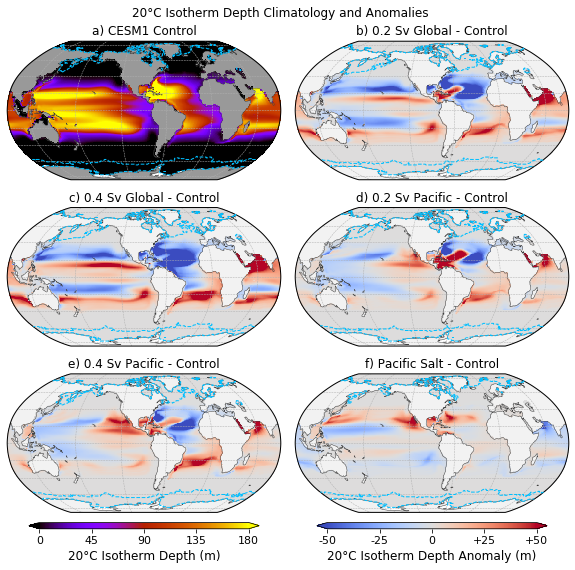

In [11]:
# -------------- figure creation

a = u"\u00b0"
vanom1=-50
vanom2=50

fig = plt.figure(figsize=(8,7))

fig.suptitle(r'20'+a+'C Isotherm Depth Climatology and Anomalies', fontsize=12, x=0.475, y=1.03)

# --------------

ax1 = plt.axes([0., 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax1.set_title('a) CESM1 Control', fontsize=12)

data, lons = add_cyclic_point(cntrl_20c * 0.01, coord=lon)
cs1 = ax1.pcolormesh(lons, lat, data, cmap='gnuplot', vmin=0, vmax=180, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_cntrl, coord=lon)
ax1.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax1.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax1.add_feature(cartopy.feature.LAND, facecolor='0.6')
ax1.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax2 = plt.axes([0.5, 0.66, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax2.set_title('b) 0.2 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point((g02sv_20c - cntrl_20c) * 0.01, coord=lon)
cs2 = ax2.pcolormesh(lons, lat, data, cmap='coolwarm', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_g02sv, coord=lon)
ax2.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax2.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax2.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax2.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax3 = plt.axes([0., 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax3.set_title('c) 0.4 Sv Global - Control', fontsize=12)

data, lons = add_cyclic_point((g04sv_20c - cntrl_20c) * 0.01, coord=lon)
ax3.pcolormesh(lons, lat, data, cmap='coolwarm', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_g04sv, coord=lon)
ax3.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax3.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax3.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax3.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax4 = plt.axes([0.5, 0.33, 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax4.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point((p02sv_20c - cntrl_20c) * 0.01, coord=lon)
ax4.pcolormesh(lons, lat, data, cmap='coolwarm', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_p02sv, coord=lon)
ax4.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax4.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax4.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax4.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax5 = plt.axes([0., 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax5.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

data, lons = add_cyclic_point((p04sv_20c - cntrl_20c) * 0.01, coord=lon)
ax5.pcolormesh(lons, lat, data, cmap='coolwarm', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_p04sv, coord=lon)
ax5.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax5.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax5.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax5.gridlines(linestyle='--', linewidth=0.5)

# --------------

ax6 = plt.axes([0.5, 0., 0.475, 0.33], projection=ccrs.Robinson(central_longitude=270))
ax6.set_title('f) Pacific Salt - Control', fontsize=12)

data, lons = add_cyclic_point((psalt_20c - cntrl_20c) * 0.01, coord=lon)
ax6.pcolormesh(lons, lat, data, cmap='coolwarm', vmin=vanom1, vmax=vanom2, transform=ccrs.PlateCarree())

iceline, _ = add_cyclic_point(seaice_psalt, coord=lon)
ax6.contour(lons, lat, iceline.data, colors='deepskyblue', 
            levels=[0,1], linewidths=1., linestyles='dashed', transform=ccrs.PlateCarree(), zorder=30)

ax6.coastlines(resolution='110m', color='0.25', linewidth=0.5)
ax6.add_feature(cartopy.feature.LAND, facecolor='0.95')
ax6.gridlines(linestyle='--', linewidth=0.5)

# -------------- colorbars

cbar_ax = fig.add_axes([0.0375, -0.005, 0.4, 0.0125])
ticks_1 = [0,45,45*2,45*3,180]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=11)
cbar.set_label(r'20'+a+'C Isotherm Depth (m)', fontsize=12)

# --------------

cbar_ax = fig.add_axes([0.5375, -0.005, 0.4, 0.0125])
ticks_1 = [-50,-25,0,25,50]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.ax.set_xticklabels(['-50','-25','0','+25','+50'])
cbar.ax.tick_params(labelsize=11)
cbar.set_label(r'20'+a+'C Isotherm Depth Anomaly (m)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig4.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig4.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------